In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
youtube = pd.read_csv("USvideos.csv")
youtube = youtube[youtube['category_id']==26]

In [4]:
youtube = youtube[['title','tags','views','likes','dislikes','comment_count','trending_date','publish_time']]
youtube = youtube.dropna()
youtube.drop_duplicates(subset = 'title', keep = 'last',inplace = True)
youtube.head()

,title,tags,views,likes,dislikes,comment_count,trending_date,publish_time
143,Three meals that cost me $1.50 each,"brothers green eats|""budget cooking""|""cooking ...",77630,1991,83,208,17.14.11,2017-11-09T14:00:08.000Z
159,"Chapter 28: I Love My Baby But, I Miss My Dad","Whitney Port|""I Love My Baby But""|""Grief""|""Gri...",55398,1170,22,336,17.14.11,2017-11-09T17:22:40.000Z
171,FACE SURGERY WITH MAKEUP,"makeup|""makeup tutorial""|""surgery""|""transforma...",471266,23634,460,1714,17.14.11,2017-11-09T03:27:36.000Z
179,Chocolate Orange Autumn Cupcakes | Cupcake Jemma,"cupcakes|""cupcake""|""cup cake""|""cake""|""cakes""|""...",122669,5723,55,263,17.14.11,2017-11-09T18:30:01.000Z
183,My Every Day Autumn Makeup | Zoella,"zoe sugg|""zoe""|""sugg""|""zoella""|""beauty""|""cosme...",1390440,86207,1775,710,17.14.11,2017-11-08T18:24:16.000Z


In [5]:
youtube.describe()

,views,likes,dislikes,comment_count
count,6.020000e+02,602.000000,602.000000,602.000000
mean,9.293113e+05,34478.192691,1178.961794,4831.335548
std,2.583927e+06,55167.320801,3441.104529,14743.444112
min,1.370000e+03,0.000000,0.000000,0.000000
25%,1.394500e+05,4724.000000,137.000000,475.750000
50%,4.110965e+05,15204.000000,390.000000,1306.000000
75%,9.792240e+05,40898.000000,1039.250000,3712.750000
max,5.415592e+07,605954.000000,66632.000000,203884.000000


## Total number of tags VS views

In this section, we focus on investigating whether the __total number of tags__ used in a video will affect the number of __views__ it get.

To start, we first create a separate column in the original dataset to record the number of tags used in each video. We call this column __count_tags__

In [6]:
# Convert the 'tags' column to a list, where tags_list[i] represent video i's tags
tags = youtube['tags']
tags_list = list(tags)

new_tags = []
count_tags = []

# Split words in tags into a list of tags
for s in tags_list:
    s = s.split('|')
    new_tags.append(s)

# Make list of how many tags are in each video
for i in new_tags:
    count_tags.append(len(i))

# Prepare count_tags to be added into dataframe
count_tag = np.array(count_tags, dtype=np.int64)
count_tag = pd.Series(count_tag)

# Add count_tag to dataframe
youtube['count_tags'] = count_tag.values

# Now we can see 'count_tags' column is successfully added to the dataframe
youtube.head()


,title,tags,views,likes,dislikes,comment_count,trending_date,publish_time,count_tags
143,Three meals that cost me $1.50 each,"brothers green eats|""budget cooking""|""cooking ...",77630,1991,83,208,17.14.11,2017-11-09T14:00:08.000Z,19
159,"Chapter 28: I Love My Baby But, I Miss My Dad","Whitney Port|""I Love My Baby But""|""Grief""|""Gri...",55398,1170,22,336,17.14.11,2017-11-09T17:22:40.000Z,6
171,FACE SURGERY WITH MAKEUP,"makeup|""makeup tutorial""|""surgery""|""transforma...",471266,23634,460,1714,17.14.11,2017-11-09T03:27:36.000Z,28
179,Chocolate Orange Autumn Cupcakes | Cupcake Jemma,"cupcakes|""cupcake""|""cup cake""|""cake""|""cakes""|""...",122669,5723,55,263,17.14.11,2017-11-09T18:30:01.000Z,36
183,My Every Day Autumn Makeup | Zoella,"zoe sugg|""zoe""|""sugg""|""zoella""|""beauty""|""cosme...",1390440,86207,1775,710,17.14.11,2017-11-08T18:24:16.000Z,22


We can see that __count_tags__ column is successfully added to the dataframe, each of its value indicates the number of tags used in each video. 

In order to better see how the __count_tags__ column correlates with the __views__ column, we decided to graph the data in a scatter plot

Text(0,0.5,'Views')

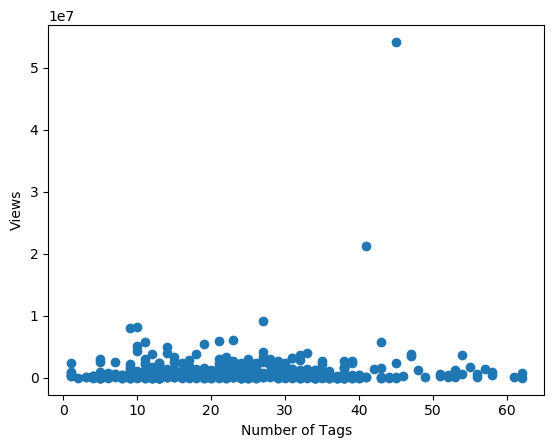

In [23]:
# Here we plot the 'count_tags' column against 'views' column
counts = list(youtube['count_tags'])
num_views = list(youtube['views'])

# Plot the data using scatter plot
plt.scatter(counts,num_views)
plt.xlabel("Number of Tags")
plt.ylabel("Views")

Here we can see that there are two extremely large value, which indicates two videos that have extremely large views. Since these two datapoints are too far away from the rest of the datapoints, they do not represent the overall correlation between __count_tags__ and __views__ column. 

Therefore, to better to picture the the overall correlation between these two columns, we will remove the outliers from the datasets by removing all datapoints that are above 10 million views

Text(0,0.5,'Views')

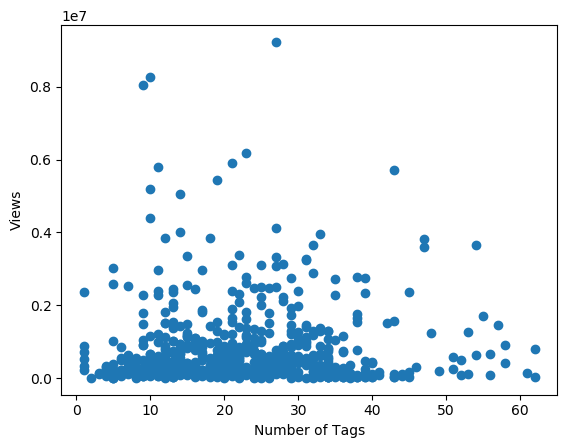

In [27]:
# Creating a new dataframe that only includes datapoints that have less or equal to 10 million views
youtube_10m = youtube[youtube['views']<=10000000]
counts = list(youtube_10m['count_tags'])
num_views = list(youtube_10m['views'])

# Plot again
plt.scatter(counts,num_views)
plt.xlabel("Number of Tags")
plt.ylabel("Views")


It's difficult to see any trend from this scatter plot. Therefore, we will build a linear model to try to predict our result. 

According to our hypothesis, we believed that the number of views is positively correlated with the number of tags, since videos with more tags are likely to see by more people. If our model shows that the two values are negatively correlated or not correlated, then it will prove our hypothesis is false. 

In the following graph, we will plot our prediction on top of our scatter plot to visualize see how well the model fits the data 


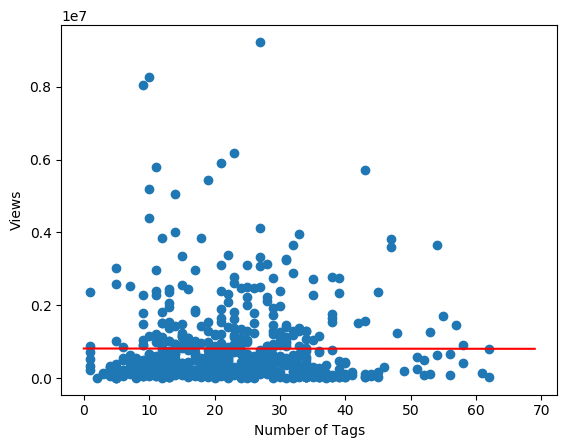

In [47]:
# Plot the scatter plot again
plt.scatter(counts,num_views)
plt.xlabel("Number of Tags")
plt.ylabel("Views")

# Use ployfit to get the best fit line, and show it in the graph
a1, b1 = np.polyfit(youtube_10m['count_tags'], youtube_10m['views'], 1)
count_tags_range = np.arange(0., 70.)
pred_views = a1 * count_tags_range + b1
plt.plot(count_tags_range, pred_views, c  ='r')

As we can see from the graph, there doesn't seem to be like a strong correlation between the number of tags and views. To check if our intuition is correct, we will use scipy's linegress method to get the r value, which indicates how well are the two correlated. 

The r value ranges from -1 to 1. If the r value is -1, it means our data shows a perfectly negative relationship; if the r value is is 1, it means our data shows a perfectly postive relationship; if the r value is is 0, it means our data shows no relationship.

In [48]:
import scipy.stats
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(youtube_10m['count_tags'], youtube_10m['views'])

print("r value is: ",r_value)

r value is:  -0.0012811657995536235


From the result, we can see that the r value is close to 0, which indicates that there is not a clear relationship between the number of tags used and the views of a video. 

Therefore, our hypothesis regarding the relationship between the number of tags used and the views is proven to be false

# This is end of Total number of tags VS views analysis. Below is the "publish to trending analysis", DO NOT include in the final draft

In [9]:
#test = youtube[youtube['views'] > 4000000]

test = youtube
print(test.shape)
test = test[['publish_time', 'trending_date']]
test.head(10)


(602, 9)


,publish_time,trending_date
143,2017-11-09T14:00:08.000Z,17.14.11
159,2017-11-09T17:22:40.000Z,17.14.11
171,2017-11-09T03:27:36.000Z,17.14.11
179,2017-11-09T18:30:01.000Z,17.14.11
183,2017-11-08T18:24:16.000Z,17.14.11
189,2017-11-08T18:00:05.000Z,17.14.11
359,2017-11-10T16:01:04.000Z,17.15.11
364,2017-11-10T18:42:55.000Z,17.15.11
378,2017-11-10T01:30:00.000Z,17.15.11
387,2017-11-10T22:22:04.000Z,17.15.11


In [10]:
print(type(test['trending_date'].values[0])) # dates are in strings, trending date
print(type(test['publish_time'].values[0])) # dates are in strings, trending date

#for elem in test['publish_time'].values:
#    print(elem)
    
test['publish_time'] = test['publish_time'].str[:10].astype(str)

test.head(10)



#sum((test['publish_time'].isnull()))

<class 'str'>
<class 'str'>


/Users/tma2017/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,publish_time,trending_date
143,2017-11-09,17.14.11
159,2017-11-09,17.14.11
171,2017-11-09,17.14.11
179,2017-11-09,17.14.11
183,2017-11-08,17.14.11
189,2017-11-08,17.14.11
359,2017-11-10,17.15.11
364,2017-11-10,17.15.11
378,2017-11-10,17.15.11
387,2017-11-10,17.15.11


In [11]:
test['trending_date'] = '20' + test['trending_date']

/Users/tma2017/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
test['trending_date'] = test['trending_date'].str.replace('.','-')
test.head()

/Users/tma2017/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,publish_time,trending_date
143,2017-11-09,2017-14-11
159,2017-11-09,2017-14-11
171,2017-11-09,2017-14-11
179,2017-11-09,2017-14-11
183,2017-11-08,2017-14-11


In [13]:
#print(test['trending_date'].str[7:10])

test['trending_date'] = test['trending_date'].str[0:4]+test['trending_date'].str[7:10]+test['trending_date'].str[4:7]
test.head()

/Users/tma2017/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,publish_time,trending_date
143,2017-11-09,2017-11-14
159,2017-11-09,2017-11-14
171,2017-11-09,2017-11-14
179,2017-11-09,2017-11-14
183,2017-11-08,2017-11-14


In [14]:
test['trending_date'] = pd.to_datetime(test['trending_date'])
test['publish_time'] = pd.to_datetime(test['publish_time'])

test['publish_to_trending'] = test['trending_date'] - test['publish_time']

test.head(n=100)
test.size

/Users/tma2017/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tma2017/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tma2017/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

1806

In [15]:
import datetime
test_weekends = test[test['publish_time'].dt.dayofweek >= 5]
test_weekdays = test[test['publish_time'].dt.dayofweek < 5]

test_weekends = test_weekends.drop(columns=["trending_date"])
test_weekdays = test_weekdays.drop(columns=["trending_date"])
test_weekends.head()

,publish_time,publish_to_trending
511,2017-11-12,4 days
575,2017-11-11,5 days
577,2017-11-11,5 days
776,2017-11-12,5 days
1252,2017-11-18,2 days


In [16]:
mean_weekends= test_weekends["publish_to_trending"].mean()
mean_weekdays = test_weekdays["publish_to_trending"].mean()
print('Averages')
print(mean_weekends)
print(mean_weekdays)
sd_weekends = test_weekends["publish_to_trending"].std()
sd_weekdays = test_weekdays["publish_to_trending"].std()
print("Standard Deviations")
print(sd_weekends)
print(sd_weekdays)

Averages
8 days 06:46:57.391304
12 days 09:21:43.448275
Standard Deviations
5 days 00:05:13.843471
50 days 12:42:41.232654


In [17]:
import researchpy as rp

test_weekends["weekends_ptt"] = test_weekends["publish_to_trending"].dt.days
test_weekdays["weekdays_ptt"] = test_weekdays["publish_to_trending"].dt.days

descriptives, results = rp.ttest(test_weekends["weekends_ptt"],test_weekdays["weekdays_ptt"])
results

,Independent t-test,results
0,Difference (weekends_ptt - weekdays_ptt) =,-4.1075
1,Degrees of freedom =,600.0000
2,t =,-0.9530
3,Two side test p value =,0.3410
4,Mean of weekends_ptt > mean of weekdays_ptt p ...,0.1705
5,Mean of weekends_ptt < mean of weekdays_ptt p ...,0.8295
6,Cohen's d =,-0.0924
7,Hedge's g =,-0.0923
8,Glass's delta =,-0.8209
9,r =,0.0389


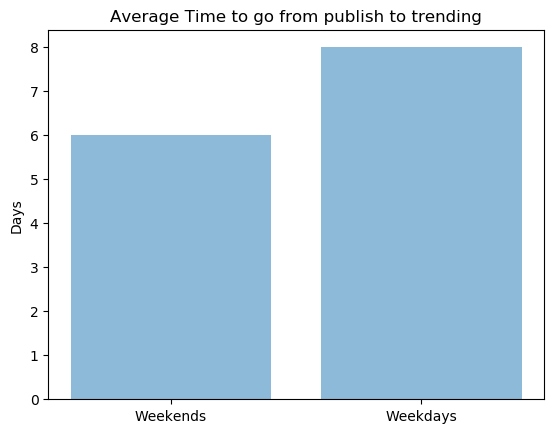

In [18]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Weekends', 'Weekdays')
y_pos = np.arange(len(objects))
performance = [6,8]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Days')
plt.title('Average Time to go from publish to trending')

plt.show()

In [19]:
test_mon = test[test['publish_time'].dt.dayofweek ==0].drop(columns=["trending_date"])
test_tue = test[test['publish_time'].dt.dayofweek ==1].drop(columns=["trending_date"])
test_wed = test[test['publish_time'].dt.dayofweek ==2].drop(columns=["trending_date"])
test_thu = test[test['publish_time'].dt.dayofweek ==3].drop(columns=["trending_date"])
test_fri = test[test['publish_time'].dt.dayofweek ==4].drop(columns=["trending_date"])
test_sat = test[test['publish_time'].dt.dayofweek ==5].drop(columns=["trending_date"])
test_sun = test[test['publish_time'].dt.dayofweek ==6].drop(columns=["trending_date"])

In [20]:
mean_mon = test_mon["publish_to_trending"].mean()
mean_tue = test_tue["publish_to_trending"].mean()
mean_wed = test_wed["publish_to_trending"].mean()
mean_thu = test_thu["publish_to_trending"].mean()
mean_fri = test_fri["publish_to_trending"].mean()
mean_sat = test_sat["publish_to_trending"].mean()
mean_sun = test_sun["publish_to_trending"].mean()

In [21]:
print(mean_mon)
print(mean_tue)
print(mean_wed)
print(mean_thu)
print(mean_fri)
print(mean_sat)
print(mean_sun)

8 days 04:12:58.378378
12 days 00:13:42.857142
17 days 02:54:57.196261
13 days 03:29:42.524271
9 days 07:02:24
7 days 21:47:22.105263
8 days 17:48:23.225806


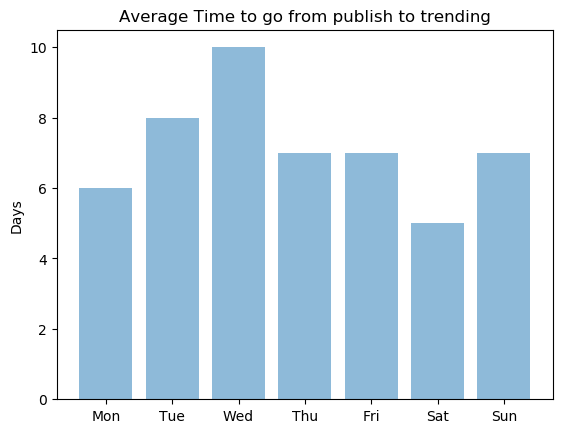

In [22]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun')
y_pos = np.arange(len(objects))
performance = [6,8,10,7,7,5,7]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Days')
plt.title('Average Time to go from publish to trending')

plt.show()